In [2]:
import pandas as pd
import numpy

# 1. Dataset: Histórico de Siniestros Bogotá

This dataset can be downloaded from [Datos Abiertos Bogotá](https://datosabiertos.bogota.gov.co/dataset/8624f916-1db2-4c17-b669-19a19b35d1ca)

In [3]:
hist_siniestros = pd.read_csv('../0 - datasets/historico_siniestros_bogota_d.c_-.csv')
hist_siniestros.head()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


## Dataset Description 

The following result shows how many records has the dataset, and which fields has missing values

In [4]:
hist_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199146 entries, 0 to 199145
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     199146 non-null  float64
 1   Y                     199146 non-null  float64
 2   OBJECTID              199146 non-null  int64  
 3   FORMULARIO            199146 non-null  object 
 4   CODIGO_ACCIDENTE      199146 non-null  int64  
 5   FECHA_OCURRENCIA_ACC  199146 non-null  object 
 6   ANO_OCURRENCIA_ACC    199146 non-null  int64  
 7   DIRECCION             199146 non-null  object 
 8   GRAVEDAD              199146 non-null  object 
 9   CLASE_ACC             199146 non-null  object 
 10  LOCALIDAD             199100 non-null  object 
 11  FECHA_HORA_ACC        199146 non-null  object 
 12  LATITUD               199146 non-null  float64
 13  LONGITUD              199146 non-null  float64
 14  CIV                   197445 non-null  float64
 15  

It's possible to identify that `LOCALIDAD`, `CIV` and `PK_CALZADA` has missing values. But this dataset has not missing values for `LATITUD`, `LONGITUD` and `DIRECCION` fields. So we can identify which `LOCALIDAD` would be in each accident record.

Visualizing the information about the `LOCALIDAD` field, when it is `null` over time and comparing it with all the accidents, we have:

In [5]:
total_accidents_by_year = hist_siniestros.groupby(by=['ANO_OCURRENCIA_ACC']).size().to_frame(name='TOTAL_ACCIDENTS')
null_accidents_by_year = hist_siniestros[hist_siniestros['LOCALIDAD'].isnull()].groupby(by=['ANO_OCURRENCIA_ACC']).size().to_frame(name='NULL_ACCIDENTS')

localidad_comparison = pd.merge(total_accidents_by_year, null_accidents_by_year, left_on='ANO_OCURRENCIA_ACC', right_on='ANO_OCURRENCIA_ACC')
localidad_comparison['PORCENTAJE'] = (localidad_comparison['NULL_ACCIDENTS']/localidad_comparison['TOTAL_ACCIDENTS']) * 100
localidad_comparison

,TOTAL_ACCIDENTS,NULL_ACCIDENTS,PORCENTAJE
ANO_OCURRENCIA_ACC,,,
2015,27885,7,0.025103
2016,31928,10,0.031320
2017,32415,6,0.018510
2018,33418,15,0.044886
2019,32962,2,0.006068
2021,18114,6,0.033124


## Exploratory Data Analysis

In [7]:
#Convertir a fechas:

hist_siniestros["FECHA_OCURRENCIA_ACC"]= pd.to_datetime(hist_siniestros["FECHA_OCURRENCIA_ACC"])
hist_siniestros["FECHA_HORA_ACC"]= pd.to_datetime(hist_siniestros["FECHA_HORA_ACC"])
hist_siniestros[["FECHA_OCURRENCIA_ACC","FECHA_OCURRENCIA_ACC"]].head()

,FECHA_OCURRENCIA_ACC,FECHA_OCURRENCIA_ACC
0,2017-06-12 00:00:00+00:00,2017-06-12 00:00:00+00:00
1,2020-11-19 00:00:00+00:00,2020-11-19 00:00:00+00:00
2,2020-11-10 00:00:00+00:00,2020-11-10 00:00:00+00:00
3,2015-05-11 00:00:00+00:00,2015-05-11 00:00:00+00:00
4,2016-06-08 00:00:00+00:00,2016-06-08 00:00:00+00:00


In [8]:
hist_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199146 entries, 0 to 199145
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   X                     199146 non-null  float64            
 1   Y                     199146 non-null  float64            
 2   OBJECTID              199146 non-null  int64              
 3   FORMULARIO            199146 non-null  object             
 4   CODIGO_ACCIDENTE      199146 non-null  int64              
 5   FECHA_OCURRENCIA_ACC  199146 non-null  datetime64[ns, UTC]
 6   ANO_OCURRENCIA_ACC    199146 non-null  int64              
 7   DIRECCION             199146 non-null  object             
 8   GRAVEDAD              199146 non-null  object             
 9   CLASE_ACC             199146 non-null  object             
 10  LOCALIDAD             199100 non-null  object             
 11  FECHA_HORA_ACC        199146 non-null  datetime64[ns

<AxesSubplot:title={'center':'Accidents'}, xlabel='DIA_ACC'>

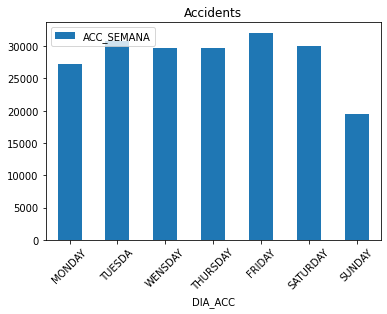

In [13]:
# Create histogram of accidents per day of the week:

hist_siniestros['DIA_ACC']=pd.to_datetime(hist_siniestros['FECHA_OCURRENCIA_ACC']).dt.weekday
ACC_SEMANA = hist_siniestros.groupby('DIA_ACC').size()

info_w=ACC_SEMANA.to_frame().reset_index() #create a new data frame with no index
info_w.columns=['DIA_ACC','ACC_SEMANA'] #add columns weekday and weekday_accidents
info_w['DIA_ACC']=info_w['DIA_ACC'].astype(str) #change the weekday type to str type
put_weekdays = {'0':'MONDAY','1':'TUESDA','2':'WENSDAY','3':'THURSDAY','4':'FRIDAY','5':'SATURDAY','6':'SUNDAY'}# create a dictionary for week days
info_w.DIA_ACC = info_w.DIA_ACC.map(put_weekdays)#apply teh dictionary to change the weekdays from numbers to days names 
info_w.plot.bar(x = 'DIA_ACC', y = 'ACC_SEMANA', title = "Accidents", rot = 45)


<AxesSubplot:title={'center':'Accidents'}, xlabel='HORA_ACC'>

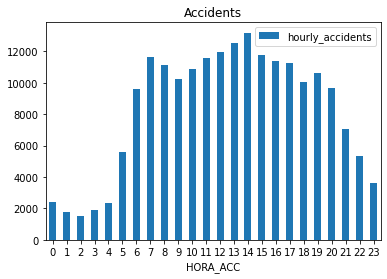

In [16]:
# Create histogram of accidents by hour:

hist_siniestros['HORA_ACC']=pd.to_datetime(hist_siniestros['FECHA_HORA_ACC']).dt.hour #create new column with the FECHA_HORA_ACC values coverted to hour 
hourly_accidents = hist_siniestros.groupby('HORA_ACC').size() # count the accidents by hour using groupby


info_h=hourly_accidents
info_h=info_h.to_frame().reset_index() #create a new data frame with no index
info_h.columns=['HORA_ACC','hourly_accidents'] #add columns Hours and hourly accidents
info_h['HORA_ACC']=info_h['HORA_ACC'].astype(str) #change the hour type to str type

info_h.plot.bar(x = 'HORA_ACC', y = 'hourly_accidents', title = "Accidents", rot = 0)


<AxesSubplot:title={'center':'Accidents by location'}, xlabel='location_acc'>

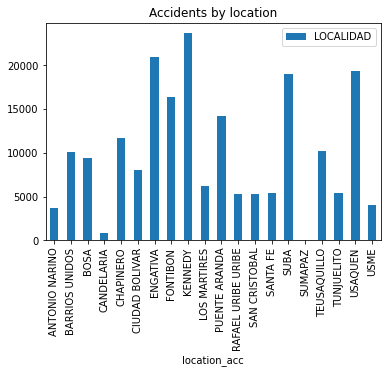

In [20]:
#Acidents by location:

location_acc = hist_siniestros.groupby('LOCALIDAD').size() #Use groupby to sum the numbe of accidents per borough

info_l=location_acc
info_l=info_l.to_frame().reset_index() #create a new data frame with no index
info_l.columns=['location_acc','LOCALIDAD'] #add columns BOROUGH and boroughs
 
info_l.plot.bar(x = 'location_acc', y = 'LOCALIDAD', title = "Accidents by location", rot = 90)